In [1]:
import pandas as pd

In [2]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

Using TensorFlow backend.


In [4]:
from PIL import Image

In [5]:
from keras.applications.mobilenet_v2 import preprocess_input

In [6]:
from keras.applications import MobileNetV2

In [7]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
from imutils import paths

In [29]:
from keras.utils import to_categorical

In [9]:
import os

In [10]:
mask_path=list(paths.list_images('/content/drive/My Drive/mask images/Dataset/with_mask'))

In [11]:
print("Total Number of Mask Images: " ,len(mask_path))

Total Number of Mask Images:  1915


In [12]:
non_mask_path=list(paths.list_images('/content/drive/My Drive/mask images/Dataset/without_mask'))

In [13]:
print("Total Number of Non Mask Images: " ,len(non_mask_path))

Total Number of Non Mask Images:  1918


In [14]:
labels=['with_mask','without_mask']

In [15]:
base_path='/content/drive/My Drive/mask images/Dataset'

In [16]:
for l in labels:
  path=os.path.join(base_path,l)
  print (path)

/content/drive/My Drive/mask images/Dataset/with_mask
/content/drive/My Drive/mask images/Dataset/without_mask


In [121]:
img=load_img(non_mask_path[1])

Text(0.5, 1.0, 'Non Mask Image')

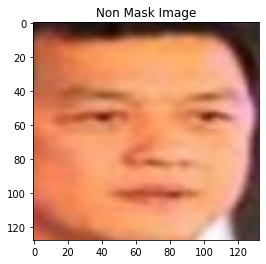

In [123]:
plt.imshow(img)
plt.title('Non Mask Image')

Text(0.5, 1.0, 'Mask Image')

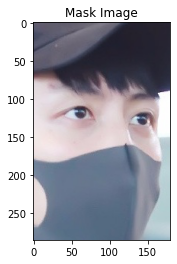

In [124]:
img2=load_img(mask_path[1])
plt.imshow(img2)
plt.title('Mask Image')

In [17]:
label=[]

In [18]:
data=[]

In [19]:
len(label)

0

In [22]:
len(data)

0

In [23]:
for l in labels:
  path=os.path.join(base_path,l)
  
  for img in os.listdir(path):
    img_path = os.path.join(path, img)
    image=load_img(img_path,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)

    data.append(image)
    label.append(l)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [24]:
print('Total Number of images: ',len(data))

Total Number of images:  3833


In [25]:
print('Total Number of labels: ',len(label))

Total Number of labels:  3833


In [30]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
label = lb.fit_transform(label)
label = to_categorical(label)



In [31]:
data = np.array(data, dtype="float32")
label = np.array(label)

In [33]:
X=data
y=label

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [35]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [69]:
from keras.layers import Dense,Dropout,Flatten,AveragePooling2D

In [37]:
from keras.optimizers import Adam

In [38]:
from keras.applications import MobileNetV2

In [39]:
from keras.models import Model

In [40]:
X_train.shape

(3066, 224, 224, 3)

In [82]:
mnetmodel=MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [83]:
for i in mnetmodel.layers:
  i.trainable=False

In [84]:
headModel = mnetmodel.output
layer1 = AveragePooling2D(pool_size=(7, 7))(headModel)
layer2 = Flatten(name="flatten")(layer1)
layer3 = Dense(128, activation="relu")(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Dense(2, activation="softmax")(layer4)

In [60]:
# layer2=Dropout(0.2)(layer1)

In [61]:
# layer3=Dense(32,activation='relu')(layer2)

In [62]:
# layer4=Dropout(0.3)(layer3)

In [63]:
# layer5=Dense(2,activation='softmax')(layer4)

In [85]:
model=Model(inputs=mnetmodel.input,outputs=layer5)

In [86]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [87]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [88]:
print("[INFO] compiling model...")
opt = Adam()
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

[INFO] compiling model...


In [89]:
history = model.fit(	aug.flow(X_train, y_train, batch_size=BS),
	steps_per_epoch=len(X_train) // BS,
	validation_data=(X_test, y_test),
	validation_steps=len(X_test) // BS,
	epochs=EPOCHS)

Epoch 1/20
95/95 [==============================] - 46s 482ms/step - loss: 0.3205 - accuracy: 0.8626 - val_loss: 0.3069 - val_accuracy: 0.8996
Epoch 2/20
95/95 [==============================] - 39s 412ms/step - loss: 0.1517 - accuracy: 0.9400 - val_loss: 0.4680 - val_accuracy: 0.8657
Epoch 3/20
95/95 [==============================] - 39s 410ms/step - loss: 0.1192 - accuracy: 0.9555 - val_loss: 0.3089 - val_accuracy: 0.9074
Epoch 4/20
95/95 [==============================] - 39s 407ms/step - loss: 0.1186 - accuracy: 0.9558 - val_loss: 0.4381 - val_accuracy: 0.8827
Epoch 5/20
95/95 [==============================] - 38s 403ms/step - loss: 0.1026 - accuracy: 0.9618 - val_loss: 0.3219 - val_accuracy: 0.9100
Epoch 6/20
95/95 [==============================] - 38s 401ms/step - loss: 0.0975 - accuracy: 0.9611 - val_loss: 0.2095 - val_accuracy: 0.9231
Epoch 7/20
95/95 [==============================] - 38s 403ms/step - loss: 0.1047 - accuracy: 0.9658 - val_loss: 0.1738 - val_accuracy: 0.9335

In [90]:
ta=history.history['accuracy']

In [91]:
va=history.history['val_accuracy']

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

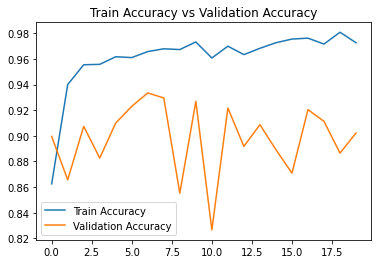

In [94]:
plt.plot(ta,label='Train Accuracy')
plt.plot(va,label='Validation Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()

In [95]:
tl=history.history['loss']

In [96]:
vl=history.history['val_loss']

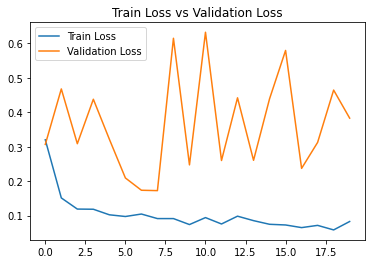

In [97]:
plt.plot(tl,label='Train Loss')
plt.plot(vl,label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()

In [98]:
print("[INFO] evaluating network...")
pred = model.predict(X_test, batch_size=BS)

[INFO] evaluating network...


In [99]:
test_pred = np.argmax(pred, axis=1)

In [102]:
y_true=np.argmax(y_test,axis=1)

In [108]:
y_true

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

In [109]:
test_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(classification_report(y_true, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       369
           1       0.84      1.00      0.91       398

    accuracy                           0.90       767
   macro avg       0.92      0.90      0.90       767
weighted avg       0.92      0.90      0.90       767



In [117]:
import pickle

In [118]:
print("[INFO] saving mask detector model...")
file=open('mask_detection_model.pkl','wb')

[INFO] saving mask detector model...


In [119]:
pickle.dump(model,file)